<a href="https://colab.research.google.com/github/devanisdwi/AI-F/blob/master/image_classification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Module and Library

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
import time
import numpy as np
import cv2
import glob

## Load Dataset

In [158]:
imagePaths = '/content/drive/MyDrive/Classroom/AI F/dataset/daun_herbal/'
label_list = ['sirih', 'seledri']
data = []
labels = []

In [159]:
for label in label_list:
  for imagePath in glob.glob(imagePaths+label+'/*.jpg'):
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32)).flatten()
    data.append(image)
    labels.append(label)

In [160]:
np.array(data).shape

(200, 3072)

## Binarization and Label Encoding

In [161]:
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)
print(labels)

['sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih' 'sirih'
 'sirih' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri'
 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seledri'
 'seledri' 'seledri' 'seledri' 'seledri' 'seledri' 'seled

In [162]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print('Ukuran Data Train =', x_train.shape)
print('Ukuran Data Test =', x_test.shape)

Ukuran Data Train = (160, 3072)
Ukuran Data Test = (40, 3072)


In [ ]:
# 1: Sirih
# 2: Seledri
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)
# print(y_train)
print(y_test)

In [165]:
# Vectorized Labels
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

## ANN Architecture

In [181]:
model = Sequential()
model.add(Dense(512, input_shape=(3072,), activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [182]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 513       
Total params: 1,573,889
Trainable params: 1,573,889
Non-trainable params: 0
_________________________________________________________________


In [183]:
# Hyperparameter
lr = 0.001
max_epochs = 100
opt_funct = RMSprop(learning_rate=lr)

In [184]:
model.compile(loss = 'binary_crossentropy',
              optimizer = opt_funct,
              metrics = ['accuracy'])

In [185]:
timer = time.time()
study = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=max_epochs, batch_size=32)
print('\n Time Taken: {:.1f} seconds'.format(time.time() - timer))

Epoch 1/100
5/5 [==============================] - 1s 55ms/step - loss: 7.2841 - accuracy: 0.5188 - val_loss: 0.4755 - val_accuracy: 0.9500
Epoch 2/100
5/5 [==============================] - 0s 26ms/step - loss: 2.0982 - accuracy: 0.5938 - val_loss: 1.7554 - val_accuracy: 0.5250
Epoch 3/100
5/5 [==============================] - 0s 25ms/step - loss: 1.5168 - accuracy: 0.5688 - val_loss: 3.0220 - val_accuracy: 0.4750
Epoch 4/100
5/5 [==============================] - 0s 26ms/step - loss: 1.7713 - accuracy: 0.4938 - val_loss: 1.0250 - val_accuracy: 0.5250
Epoch 5/100
5/5 [==============================] - 0s 27ms/step - loss: 0.7785 - accuracy: 0.6438 - val_loss: 2.1843 - val_accuracy: 0.4750
Epoch 6/100
5/5 [==============================] - 0s 25ms/step - loss: 0.9796 - accuracy: 0.7000 - val_loss: 0.8104 - val_accuracy: 0.5500
Epoch 7/100
5/5 [==============================] - 0s 26ms/step - loss: 1.0116 - accuracy: 0.5938 - val_loss: 0.3806 - val_accuracy: 0.8000
Epoch 8/100
5/5 [===

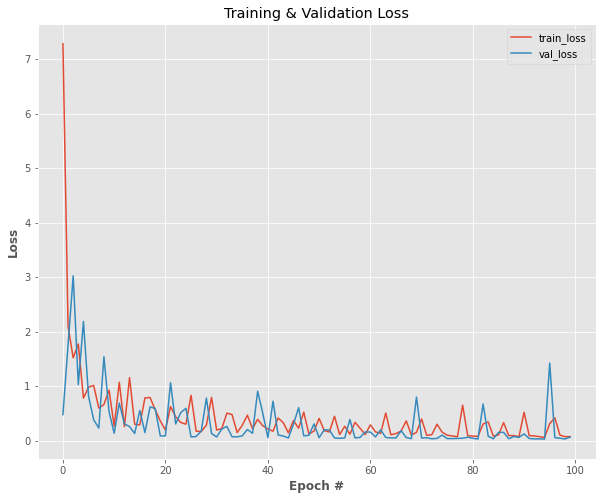

In [189]:
study2 = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure(figsize=[10,8])
plt.plot(study2, study.history["loss"], label="train_loss")
plt.plot(study2, study.history["val_loss"], label="val_loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

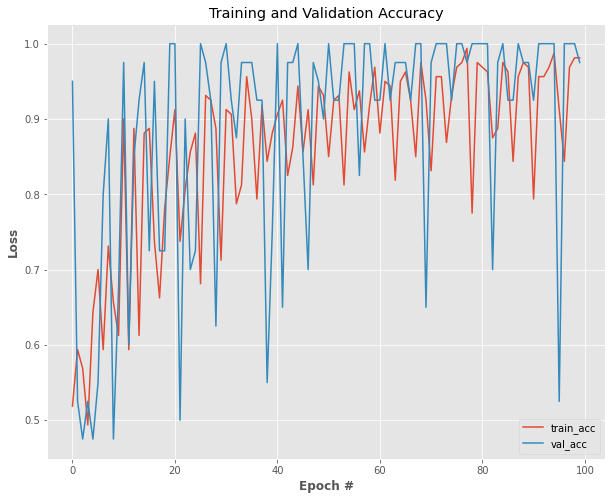

In [190]:
study2 = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure(figsize=[10,8])
plt.plot(study2, study.history["accuracy"], label="train_acc")
plt.plot(study2, study.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

## Evaluate Model

In [191]:
predictions = model.predict(x_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [201]:
queryPath = imagePaths+'check_sirih.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32)).flatten()
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
i = q_pred.argmax(axis=1)[0]
label = lb.classes_[i]

text = "{}: {:.2f}%".format(label, q_pred[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
img = cv2.imread('Output', output)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyWindow('Output')

TypeError: ignored

## Save Model

In [ ]:
# model.save('ANN_Devanis.h5')
# f = open('...', "wb")
# f.write(pickle.dumps(lb))
# f.close()